<a href="https://colab.research.google.com/github/JeffreyHernandez8656/proyectoIA/blob/main/proyectoia_Juan_Nestor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO

#INTEGRANTES
JUAN CARLOS ARIAS GONZALEZ - 2225007,
NESTOR JEFFREY HERNANDEZ RUIZ -2215108

# PREDICCIÓN DEL GENERO MUSICAL

 Este dataset está diseñado para clasificar música en diferentes géneros utilizando características de audio proporcionadas por Spotify.

#INTRODUCCION
El dataset contiene información sobre diversas pistas musicales, cada una clasificada en uno de los diez géneros: 'Electrónica', 'Anime', 'Jazz', 'Alternativa', 'Country', 'Rap', 'Blues', 'Rock', 'Clásica', y 'Hip-Hop'. Las características de audio incluidas son proporcionadas por Spotify y abarcan aspectos como la acústica, bailabilidad, duración, energía, instrumentalidad, clave musical, popularidad, entre otros.


COLUMNAS DEL DATASET:

In [ ]:
import os
from google.colab import drive

path_ai = "/content/drive/MyDrive" #@param {type:"string"}
path =  path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive


# librerias

In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import make_scorer, mean_absolute_error

#Cargue del Dataset

In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/proyecto de IA1/music_genre.csv"
meteor =  pd.read_csv(file_path)
meteor.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
meteor.describe()

instance_id    popularity  acousticness  danceability   duration_ms  \
count  50000.000000  50000.000000  50000.000000  50000.000000  5.000000e+04   
mean   55888.396360     44.220420      0.306383      0.558241  2.212526e+05   
std    20725.256253     15.542008      0.341340      0.178632  1.286720e+05   
min    20002.000000      0.000000      0.000000      0.059600 -1.000000e+00   
25%    37973.500000     34.000000      0.020000      0.442000  1.748000e+05   
50%    55913.500000     45.000000      0.144000      0.568000  2.192810e+05   
75%    73863.250000     56.000000      0.552000      0.687000  2.686122e+05   
max    91759.000000     99.000000      0.996000      0.986000  4.830606e+06   

             energy  instrumentalness      liveness      loudness  \
count  50000.000000      50000.000000  50000.000000  50000.000000   
mean       0.599755          0.181601      0.193896     -9.133761   
std        0.264559          0.325409      0.161637      6.162990   
min        0.000792          0.000000      0.009670    -47.046000   
25%        0.433000          0.000000      0.096900    -10.860000   
50%        0.643000          0.000158      0.126000     -7.276500   
75%        0.815000          0.155000      0.244000     -5.173000   
max        0.999000          0.996000      1.000000      3.744000   

        speechiness       valence  
count  50000.000000  50000.000000  
mean       0.093586      0.456264  
std        0.101373      0.247119  
min        0.022300      0.000000  
25%        0.036100      0.257000  
50%        0.048900      0.448000  
75%        0.098525      0.648000  
max        0.942000      0.992000

# Limpieza de datos:

In [ ]:
import pandas as pd
# Eliminar filas con valores nulos en cualquier columna
meteor_cleaned = meteor.dropna()

# Eliminar duplicados
meteor_cleaned = meteor_cleaned.drop_duplicates()

# Convertir columnas a tipos de datos apropiados si es necesario
# Convertir 'popularity' a entero si no lo está
meteor_cleaned['popularity'] = meteor_cleaned['popularity'].astype(int)

# Mostrar el dataset limpio
meteor_cleaned.head()


instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out          27   
1      46652.0  Thievery Corporation      The Shining Path          31   
2      30097.0        Dillon Francis             Hurricane          28   
3      62177.0              Dubloadz                 Nitro          34   
4      24907.0           What So Not      Divide & Conquer          32   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [ ]:
print(f"Filas: {meteor_cleaned.shape[0]}, Columnas: {meteor_cleaned.shape[1]}")

Filas: 50000, Columnas: 18


# MATRIZ DE CORRELACIÓN

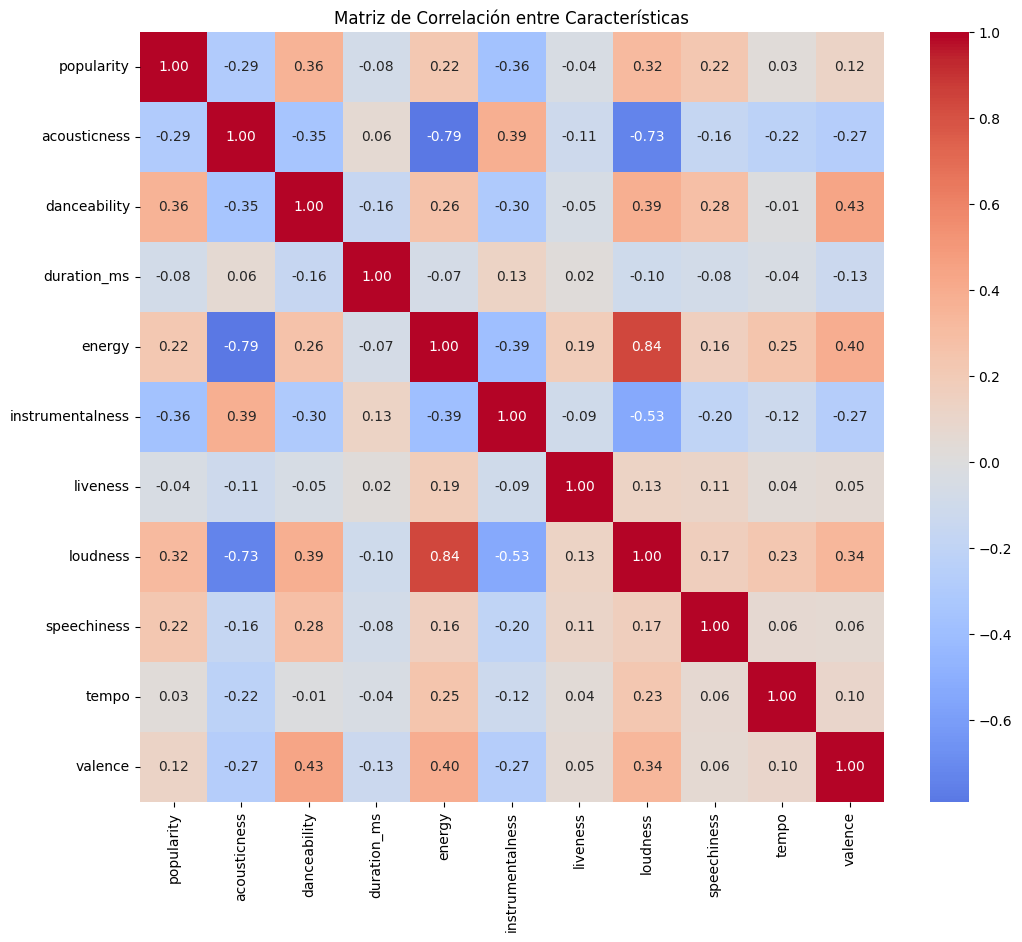

In [ ]:
meteor_cleaned.replace('?', np.nan, inplace=True)

# Select the numeric features before converting them
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                   'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'tempo', 'valence']


for col in numeric_features:
    meteor_cleaned[col] = pd.to_numeric(meteor_cleaned[col], errors='coerce')

# Fill any resulting NaN values in numeric columns, for example, with the mean
meteor_cleaned[numeric_features] = meteor_cleaned[numeric_features].fillna(meteor_cleaned[numeric_features].mean())
plt.figure(figsize=(12, 10))
corr = meteor_cleaned[numeric_features].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Características')
plt.show()

# BOXPLOTS POR GENEROS

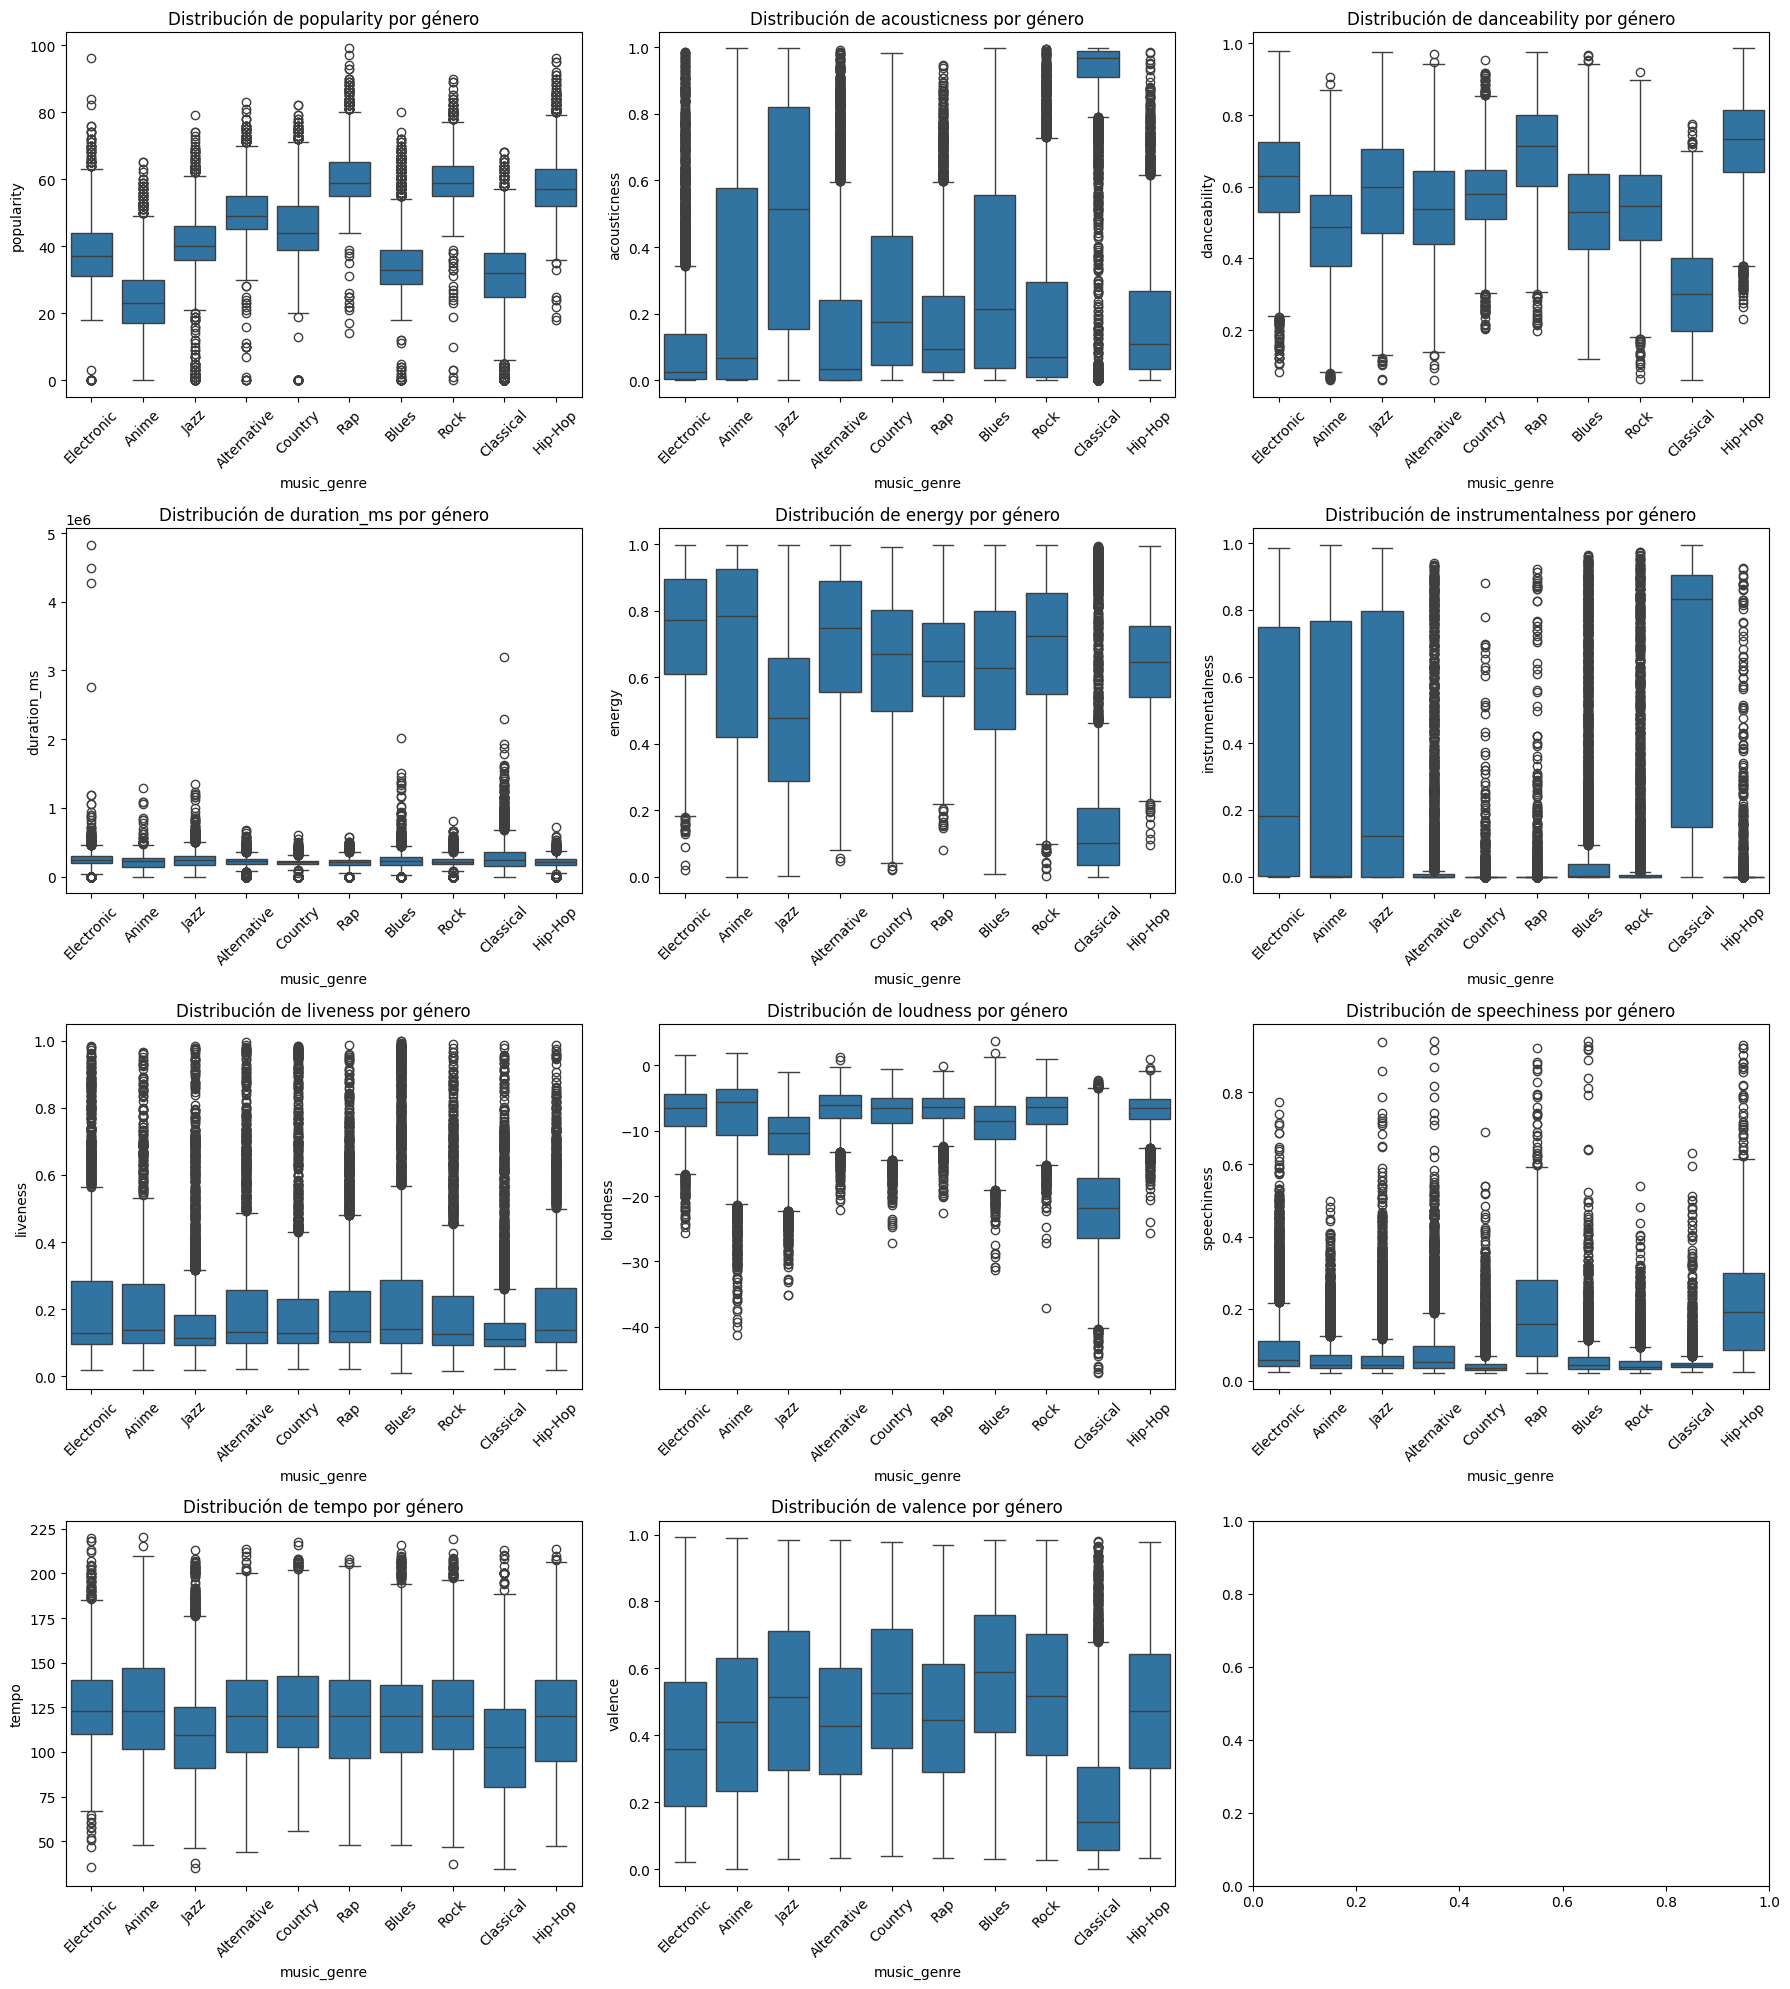

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    # Changed df_cleaned to meteor_cleaned
    sns.boxplot(data=meteor_cleaned, x='music_genre', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature} por género')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Descripción gráfica del dataset:

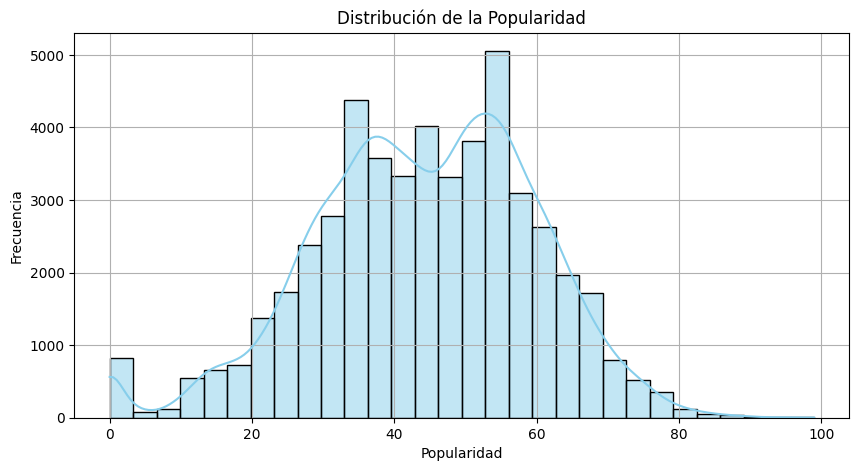

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histograma de popularidad
plt.figure(figsize=(10, 5))
sns.histplot(meteor_cleaned["popularity"], bins=30, kde=True, color="skyblue")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Popularidad")
plt.grid()
plt.show()


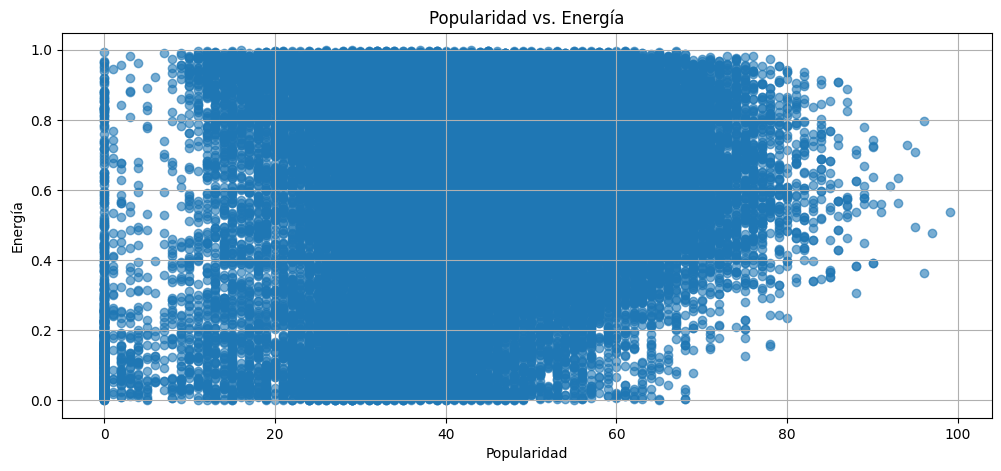

In [ ]:
# Gráfico de Popularidad en función de la Energía.
# Este gráfico muestra la relación entre la popularidad de una canción y su energía.
plt.figure(figsize=(12, 5))
plt.scatter(meteor_cleaned["popularity"], meteor_cleaned["energy"], alpha=0.6)
plt.xlabel("Popularidad")
plt.ylabel("Energía")
plt.title("Popularidad vs. Energía")
plt.grid(True)
plt.show()


<ipython-input-11-153a45d85d0f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estaciones_prom.index, y=estaciones_prom.values, palette="coolwarm")


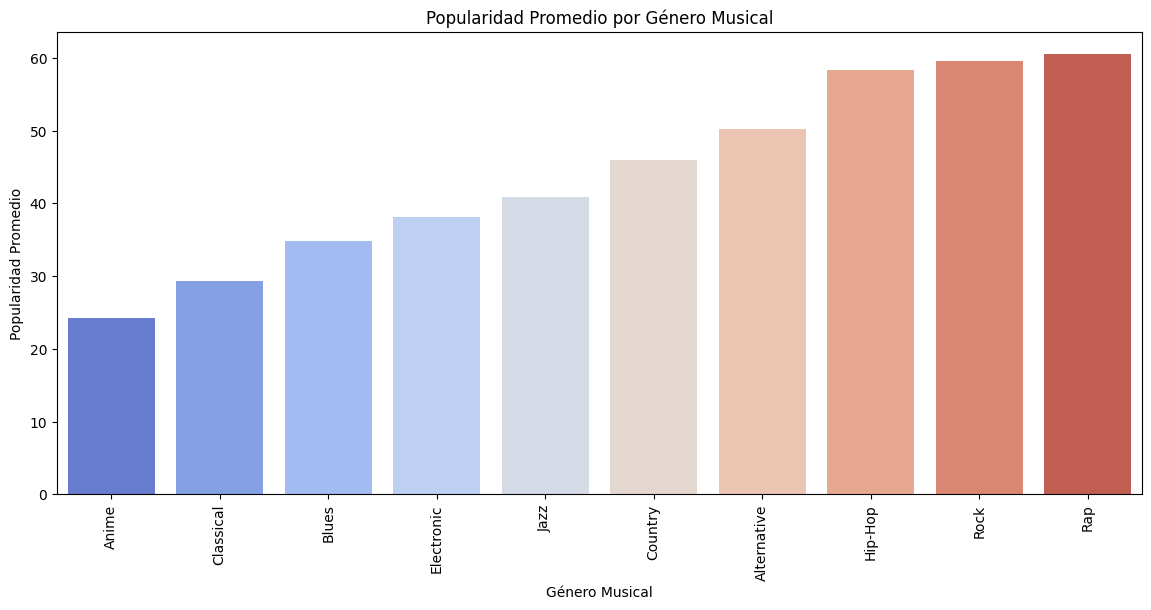

In [ ]:
# Gráfico de popularidad por Genero musical.
# Se calcula el promedio de popularidad  de  Genero musical.
plt.figure(figsize=(14, 6))
estaciones_prom = meteor_cleaned.groupby("music_genre")["popularity"].mean().sort_values()
sns.barplot(x=estaciones_prom.index, y=estaciones_prom.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Género Musical")
plt.ylabel("Popularidad Promedio")
plt.title("Popularidad Promedio por Género Musical")
plt.show()


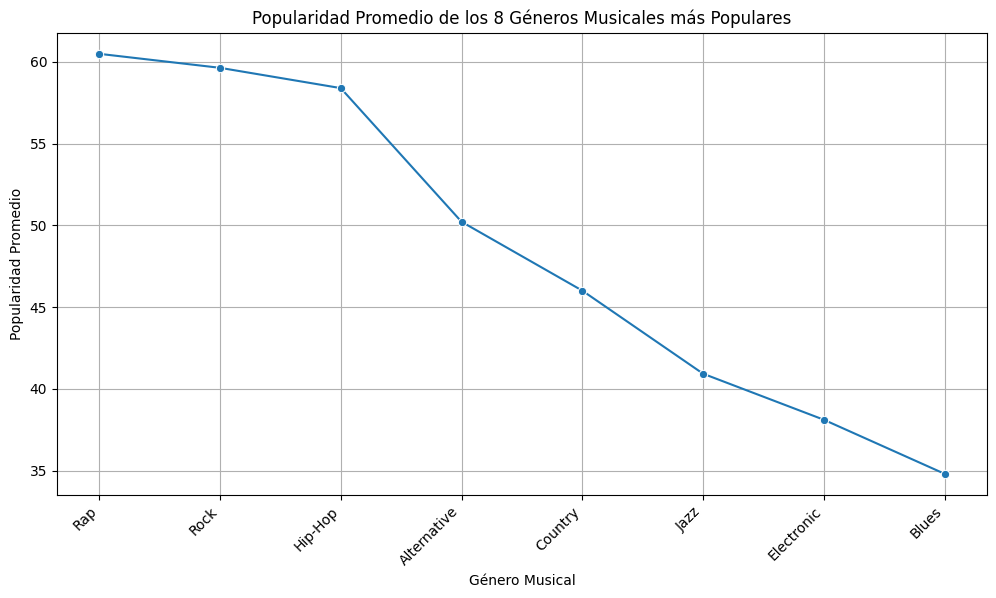

In [ ]:
# Obtener los 8 géneros con mayor popularidad promedio
top_8_genres = meteor_cleaned.groupby("music_genre")["popularity"].mean().sort_values(ascending=False).head(8)

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(x=top_8_genres.index, y=top_8_genres.values, marker='o', linestyle='-')
plt.xlabel("Género Musical")
plt.ylabel("Popularidad Promedio")
plt.title("Popularidad Promedio de los 8 Géneros Musicales más Populares")
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True)
plt.show()


#FASE 2

#Estimadores: DecisionTree, RandomForest y Support Vector Machine

In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Convertir la columna obtained_date a tipo datetime
# Se cambió el formato para que coincida con los datos de la columna 'obtained_date'
# Se utiliza 'errors='coerce'' para convertir valores no válidos a NaT (Not a Time)
meteor_cleaned['obtained_date'] = pd.to_datetime(meteor_cleaned['obtained_date'], format='%d-%b', dayfirst=True, errors='coerce')

# Imprimir filas con valores no válidos en 'obtained_date'
invalid_dates = meteor_cleaned[meteor_cleaned['obtained_date'].isnull()]
print(invalid_dates[['instance_id', 'obtained_date']])

# Extraer Día, Mes y Año (después de manejar los valores no válidos)
meteor_cleaned['Día'] = meteor_cleaned['obtained_date'].dt.day
meteor_cleaned['Mes'] = meteor_cleaned['obtained_date'].dt.month
# Asumiendo que el año es 2024
meteor_cleaned['Año'] = 2024 #

       instance_id obtained_date
28302      47388.0           NaT


   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out          27   
1      46652.0  Thievery Corporation      The Shining Path          31   
2      30097.0        Dillon Francis             Hurricane          28   
3      62177.0              Dubloadz                 Nitro          34   
4      24907.0           What So Not      Divide & Conquer          32   

   acousticness  danceability  duration_ms  energy  instrumentalness key  ...  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#  ...   
1       0.01270         0.622     218293.0   0.890           0.95000   D  ...   
2       0.00306         0.620     215613.0   0.755           0.01180  G#  ...   
3       0.02540         0.774     166875.0   0.700           0.00253  C#  ...   
4       0.00465         0.638     222369.0   0.587           0.90900  F#  ...   

   loudness   mode speechiness    tempo  obtained_date valence  musi

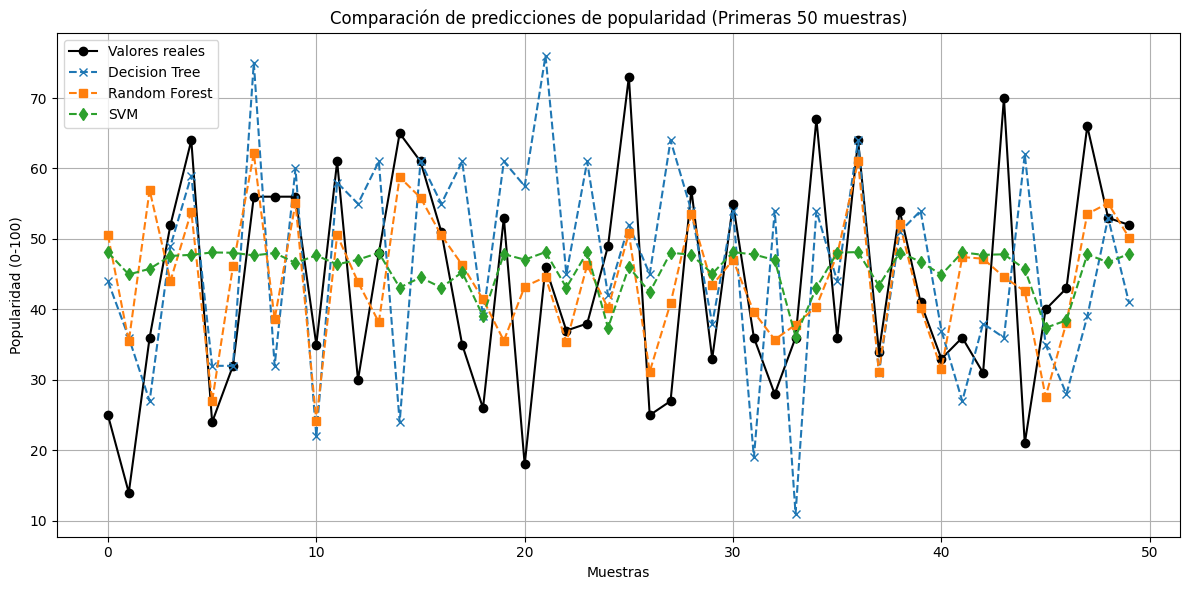

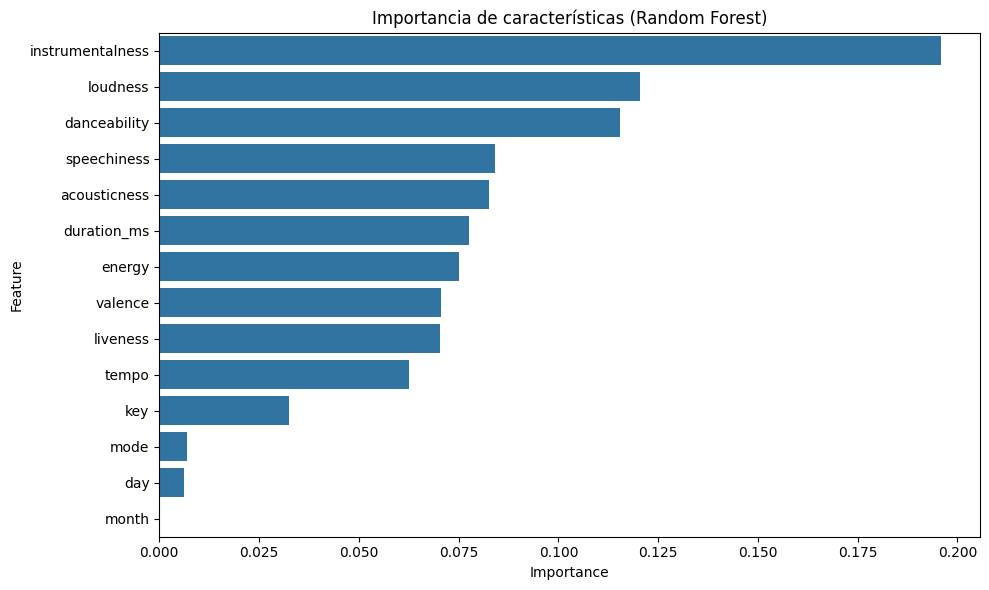

In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
df = meteor_cleaned.copy()

# Exploración inicial
print(df.head())
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

# Preprocesamiento de datos
# Manejar valores faltantes (reemplazar '?' con NaN y luego imputar o eliminar)
df.replace('?', np.nan, inplace=True)

# Convertir columnas numéricas que están como strings
numeric_cols = ['tempo', 'loudness', 'duration_ms']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores faltantes en la variable objetivo
df = df.dropna(subset=['popularity'])

# Codificar variables categóricas
encoder = LabelEncoder()
df['key'] = encoder.fit_transform(df['key'])
df['mode'] = encoder.fit_transform(df['mode'])
df['music_genre'] = encoder.fit_transform(df['music_genre'])

# Extraer día y mes de obtained_date
df['obtained_date'] = pd.to_datetime(df['obtained_date'], format='%d-%b', errors='coerce')
# Extract day and month only if the date is valid
df['day'] = df['obtained_date'].dt.day.fillna(0).astype(int) # Fill NaT with 0 and convert to int
df['month'] = df['obtained_date'].dt.month.fillna(0).astype(int)

# Seleccionar características relevantes
features = ['acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness',
            'mode', 'speechiness', 'tempo', 'valence', 'day', 'month']

X = df[features]
y = df['popularity']

# Manejar valores faltantes en las características
X = X.fillna(X.mean())

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos de Machine Learning

# --- Decision Tree ---
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# --- Random Forest ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Support Vector Machine (SVR) ---
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluación de modelos
print("\nResultados de los modelos:\n")

print("Decision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_tree):.2f}\n")

print("Random Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}\n")

print("Support Vector Machine:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svm)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_svm):.2f}\n")

# Visualización de resultados
n_muestras = 50
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:n_muestras], label='Valores reales', color='black', marker='o')
plt.plot(y_pred_tree[:n_muestras], label='Decision Tree', linestyle='--', marker='x')
plt.plot(y_pred_rf[:n_muestras], label='Random Forest', linestyle='--', marker='s')
plt.plot(y_pred_svm[:n_muestras], label='SVM', linestyle='--', marker='d')
plt.title(f'Comparación de predicciones de popularidad (Primeras {n_muestras} muestras)')
plt.xlabel('Muestras')
plt.ylabel('Popularidad (0-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Importancia de características (solo para modelos basados en árboles)
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importancia de características (Random Forest)')
plt.tight_layout()
plt.show()

# Learning curves: DecisionTree, RandomForest y Support Vector Machine

In [ ]:
# --- Librerias necesarias ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# --- Usa solo el 20% de los datos ---
X_subset = X.sample(frac=0.2, random_state=42)
y_subset = y.loc[X_subset.index]

In [ ]:
# --- Función general para curvas ---
def show_curve(est, X_data, y_data, param_name, param_values):
    means = []
    stds = []

    for val in param_values:
        # Setea el parámetro dinámicamente
        model = est.set_params(**{param_name: val})

        s = cross_val_score(model, X_data, y_data,
                            cv=KFold(5, shuffle=True, random_state=42),
                            scoring=make_scorer(mean_absolute_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.array(means)
    stds = np.array(stds)

    plt.plot(param_values, means, color='black', label='MAE')
    plt.fill_between(param_values, means-stds, means+stds, color='blue', alpha=0.5, label='std')
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend()

#Learning curve: Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

# Cross-validation para DT
dt_model = DecisionTreeRegressor()  # sin parámetros
scores = cross_val_score(
    dt_model,
    X_subset,
    y_subset,
    cv=5,
    scoring=make_scorer(mean_absolute_error)
)

# Mostrar resultados
print(f"MAE promedio: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

MAE promedio: 14.0103
Desviación estándar: 0.2741


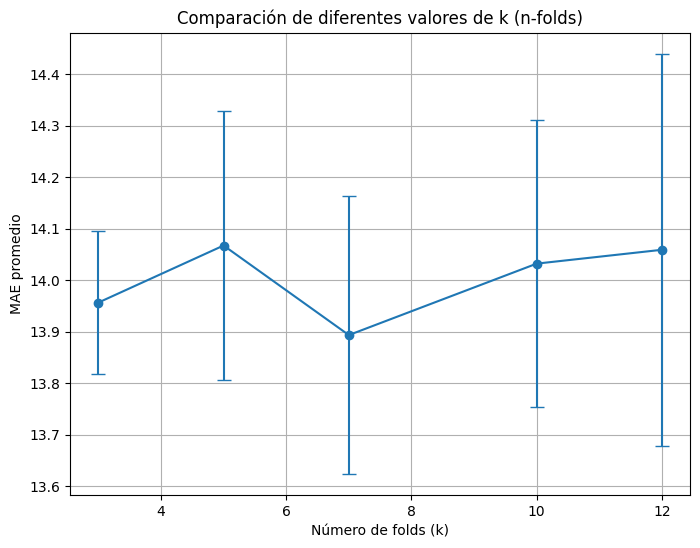

In [ ]:
#Cross-validation para distintos valores k-folds
k_values = [3,5,7,10,12]
mae_means = []
mae_stds = []

for k in k_values:
    model = DecisionTreeRegressor()
    scores = cross_val_score(
        model,
        X_subset,  # usa una muestra para acelerar
        y_subset,
        cv=k,
        scoring=make_scorer(mean_absolute_error)
    )
    mae_means.append(scores.mean())
    mae_stds.append(scores.std())

# Graficar resultados
plt.figure(figsize=(8,6))
plt.errorbar(k_values, mae_means, yerr=mae_stds, fmt='-o', capsize=5)
plt.xlabel('Número de folds (k)')
plt.ylabel('MAE promedio')
plt.title('Comparación de diferentes valores de k (n-folds)')
plt.grid(True)
plt.show()

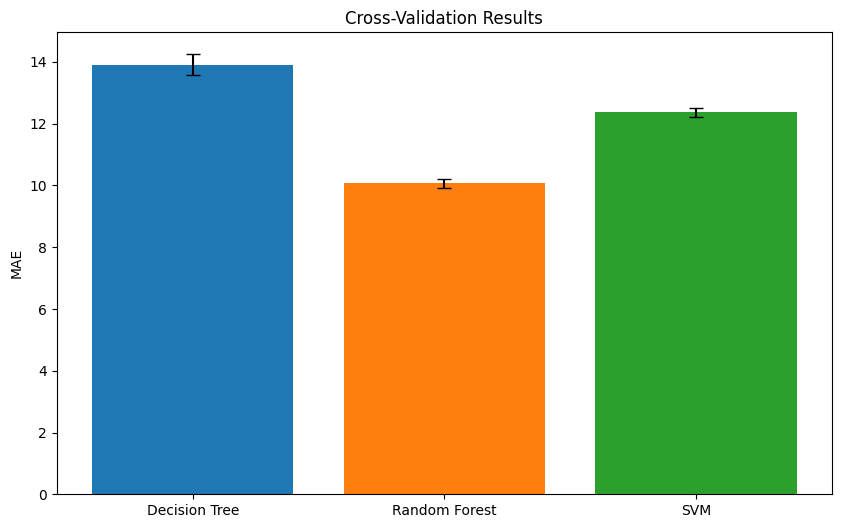

Cross-Validation Results:
Decision Tree: MAE = 13.9108 (+/- 0.3365)
Random Forest: MAE = 10.0694 (+/- 0.1545)
SVM: MAE = 12.3645 (+/- 0.1431)


In [ ]:
# Cross-validation para Decision Tree, RandomForest y SVM
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_subset, y_subset, cv=5, scoring=make_scorer(mean_absolute_error))
    results[name] = {
        'mean_mae': scores.mean(),
        'std_mae': scores.std()
    }

# Graficar resultados
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.bar(name, result['mean_mae'], yerr=result['std_mae'], capsize=5)

plt.ylabel('MAE')
plt.title('Cross-Validation Results')
plt.show()


#Mostrar resultados
print("Cross-Validation Results:")
for name, result in results.items():
    print(f"{name}: MAE = {result['mean_mae']:.4f} (+/- {result['std_mae']:.4f})")

# FASE 3

# LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

#PCA vs t-SNE:
PCA: Mejor para preservar la varianza global y reducir dimensionalidad para modelado posterior.

t-SNE: Mejor para visualización y preservar estructuras locales, pero más costoso computacionalmente.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


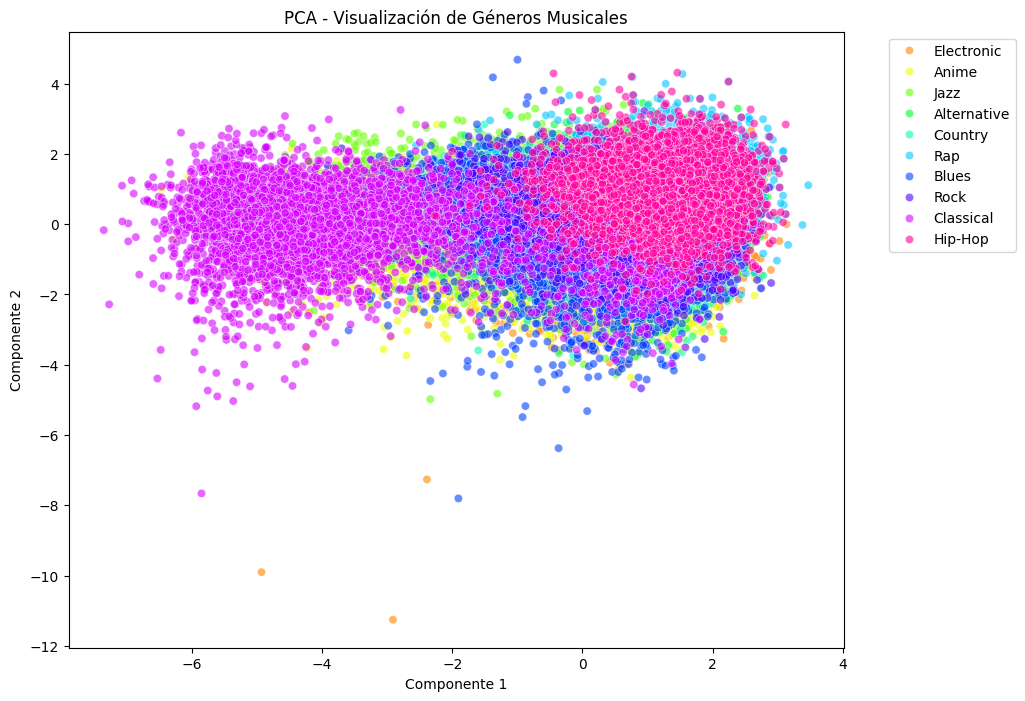

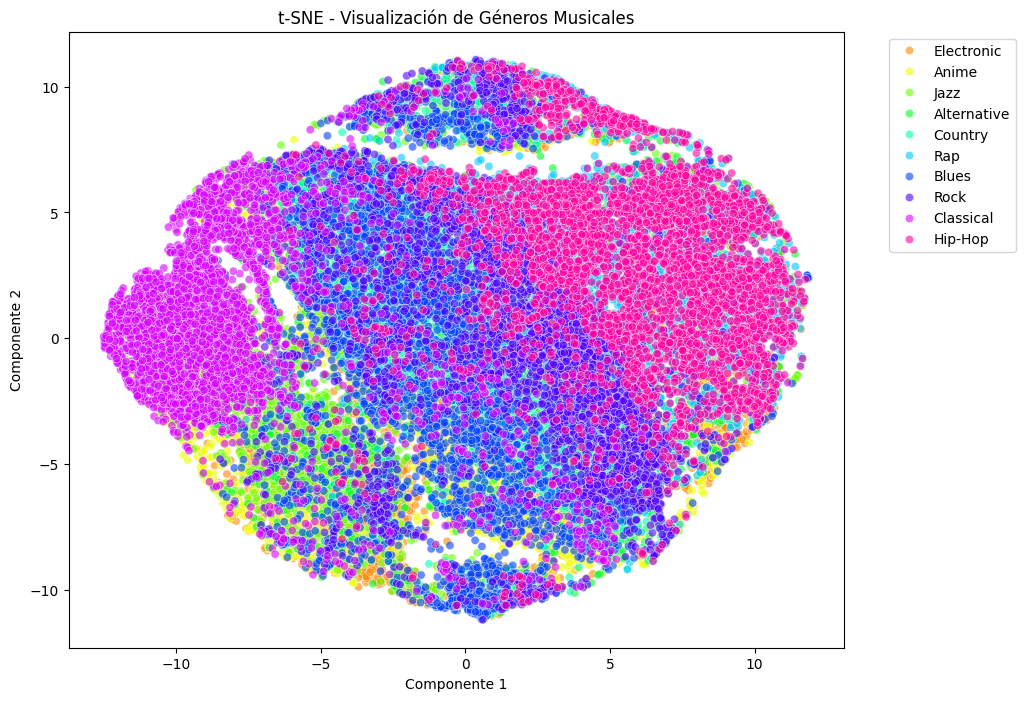

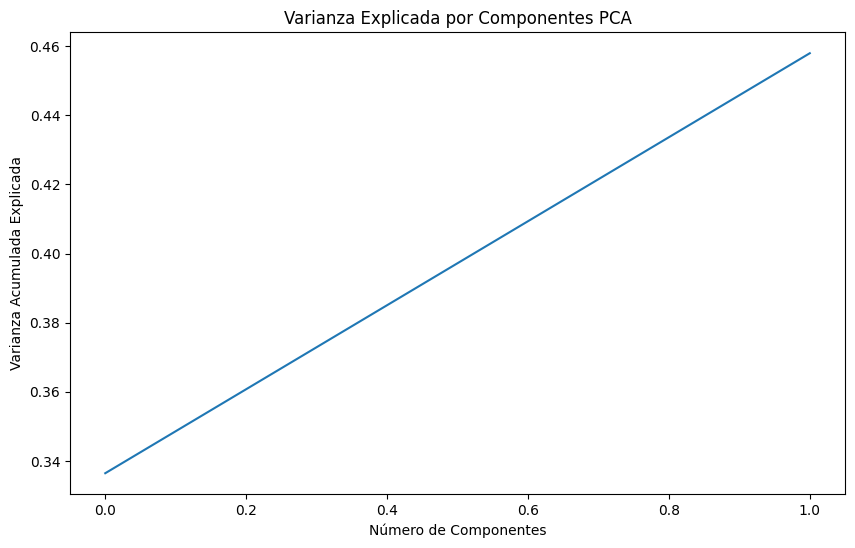

In [ ]:
# Código para implementar PCA y t-SNE

# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/proyecto de IA1/music_genre.csv')

# Limpieza de datos (como en el notebook original)
df_cleaned = df.dropna().drop_duplicates()
df_cleaned['popularity'] = df_cleaned['popularity'].astype(int)

# Seleccionar características numéricas
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                   'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'tempo', 'valence']

# Convertir tempo a numérico (actualmente es string)
df_cleaned['tempo'] = pd.to_numeric(df_cleaned['tempo'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['tempo'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[numeric_features])

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Aplicar t-SNE (puede tardar con 50k muestras)
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

# Visualización
def plot_components(components, title, target=df_cleaned['music_genre']):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=components[:, 0], y=components[:, 1],
        hue=target,
        palette=sns.color_palette("hsv", len(target.unique())),
        alpha=0.6
    )
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_components(pca_result, "PCA - Visualización de Géneros Musicales")
plot_components(tsne_result, "t-SNE - Visualización de Géneros Musicales")

# Análisis de varianza explicada (PCA)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Explicada por Componentes PCA')
plt.show()

# Dendrograma de Clustering

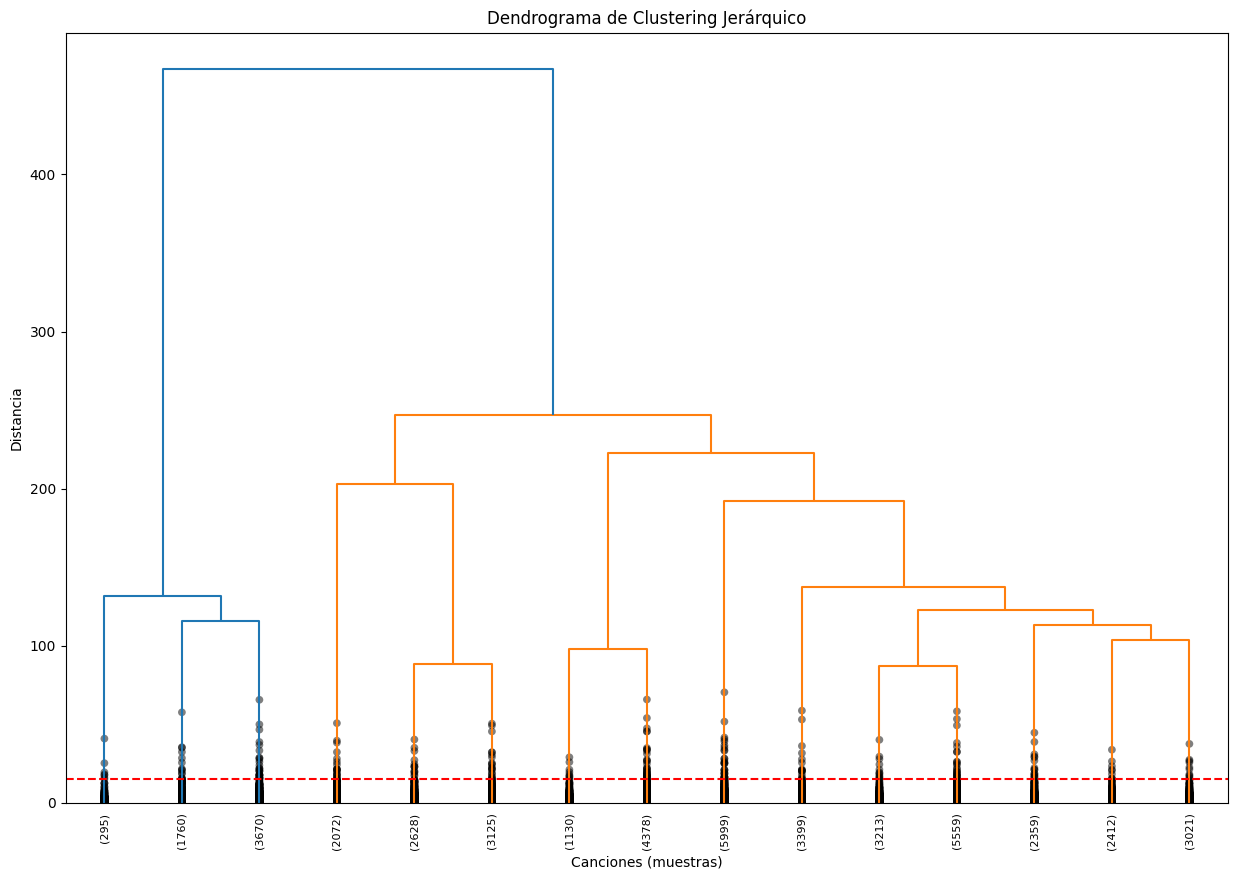

In [ ]:
import pandas as pd # Import pandas
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Cargar los datos (added)
df = pd.read_csv('/content/drive/MyDrive/proyecto de IA1/music_genre.csv')

# Limpieza de datos (como en el notebook original) (added)
df_cleaned = df.dropna().drop_duplicates()
df_cleaned['popularity'] = df_cleaned['popularity'].astype(int)

# Seleccionar características numéricas
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                   'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'tempo', 'valence']

# Convertir tempo a numérico (actualmente es string) (added)
df_cleaned['tempo'] = pd.to_numeric(df_cleaned['tempo'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['tempo'])


# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[numeric_features])
# Aplicar clustering jerárquico
Z = linkage(scaled_features, method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Canciones (muestras)')
plt.ylabel('Distancia')

# Personalizar colores por género (opcional)
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

dendrogram(
    Z,
    truncate_mode='lastp',  # Muestra solo los últimos p clusters fusionados
    p=15,                   # Número de clusters a mostrar
    show_leaf_counts=True,  # Muestra cuántas muestras hay en cada hoja
    leaf_rotation=90.,      # Rotación de etiquetas para mejor lectura
    leaf_font_size=8.,      # Tamaño de fuente
    show_contracted=True    # Muestra clusters contraídos
)

plt.axhline(y=15, color='r', linestyle='--')  # Línea para sugerir corte
plt.show()

# Clustering para Validar Agrupaciones Naturales

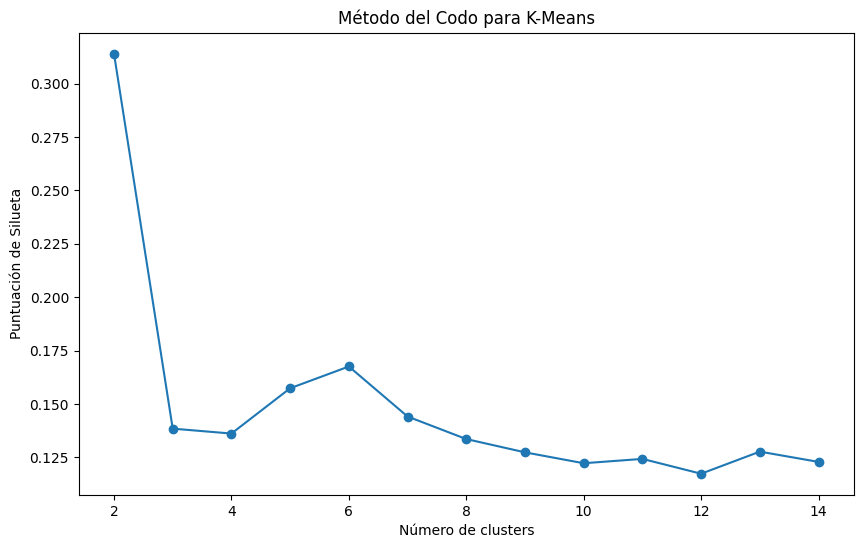

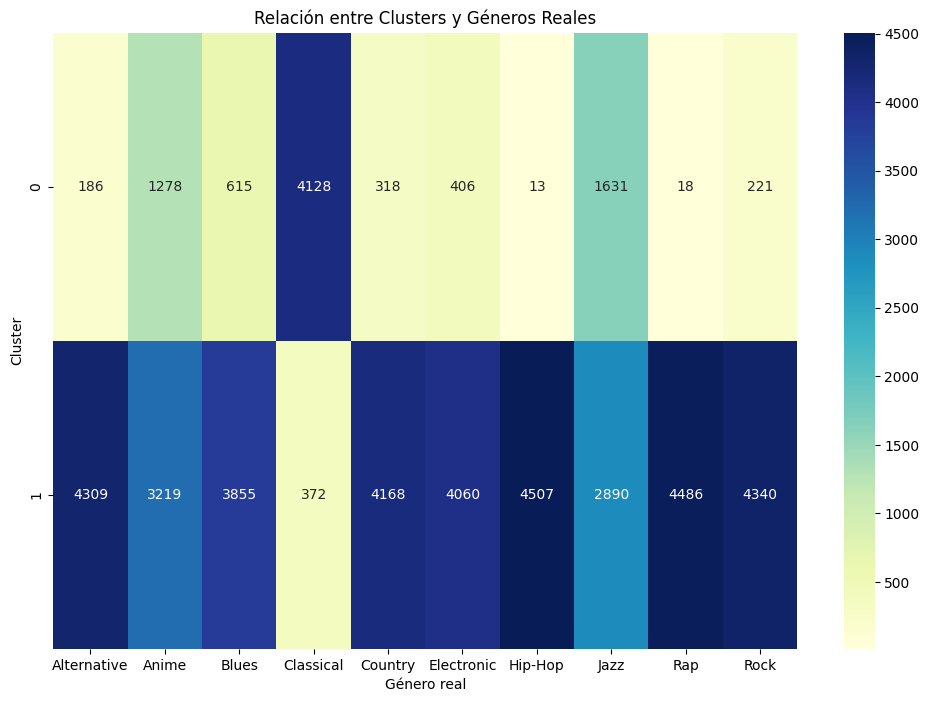

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determinar número óptimo de clusters
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, preds)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de Silueta')
plt.show()

# Aplicar K-Means con el mejor k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Comparar clusters con géneros reales
df_cleaned['cluster'] = clusters
cross_tab = pd.crosstab(df_cleaned['cluster'], df_cleaned['music_genre'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Relación entre Clusters y Géneros Reales')
plt.xlabel('Género real')
plt.ylabel('Cluster')
plt.show()

# t-SNE con parámetros optimizados:

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


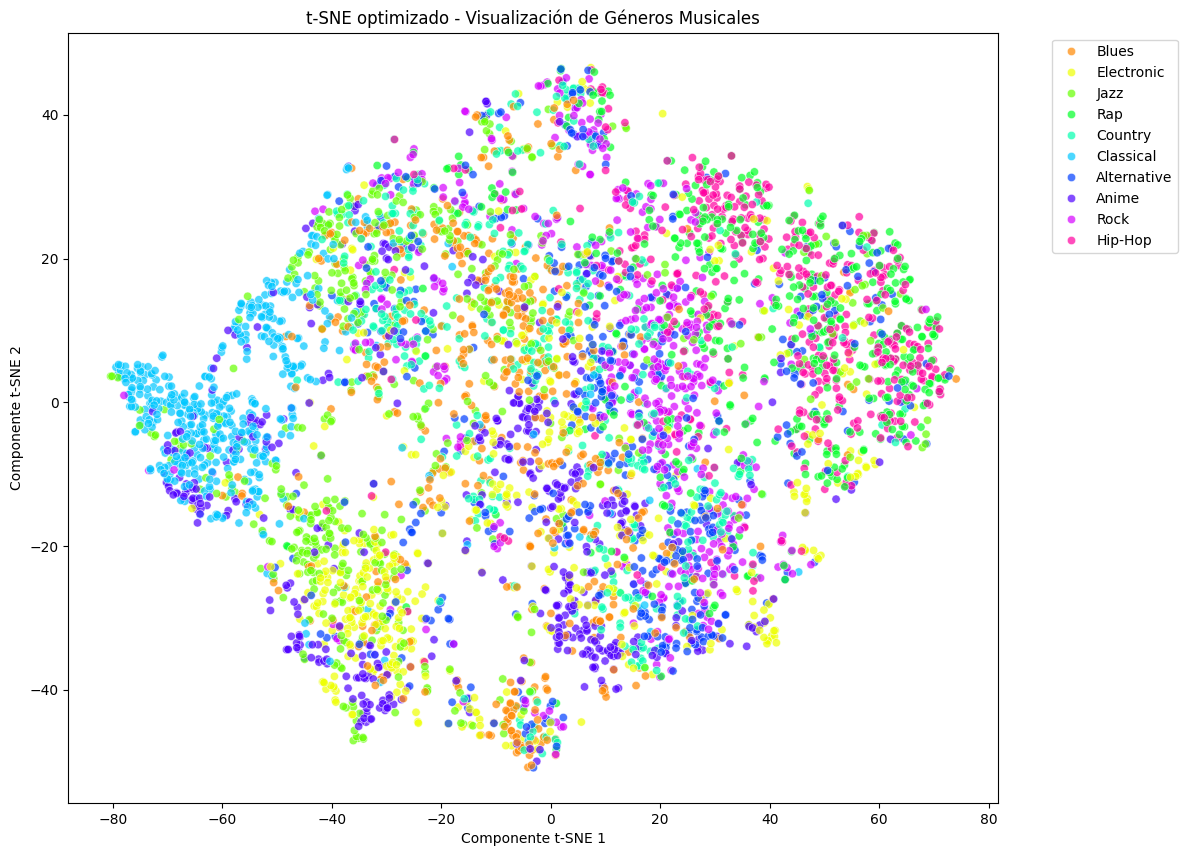

In [ ]:
# Versión más rápida para exploración (submuestreo)
sample_idx = np.random.choice(len(scaled_features), 5000, replace=False)
sample_data = scaled_features[sample_idx]
sample_genres = df_cleaned['music_genre'].iloc[sample_idx]

tsne_params = {
    'n_components': 2,
    'perplexity': 50,
    'n_iter': 1000,
    'learning_rate': 200,
    'random_state': 42
}

tsne = TSNE(**tsne_params)
tsne_result = tsne.fit_transform(sample_data)

plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=tsne_result[:, 0], y=tsne_result[:, 1],
    hue=sample_genres,
    palette=sns.color_palette("hsv", len(sample_genres.unique())),
    alpha=0.7
)
plt.title('t-SNE optimizado - Visualización de Géneros Musicales')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ANALISIS DE VALORES ATIPICOS

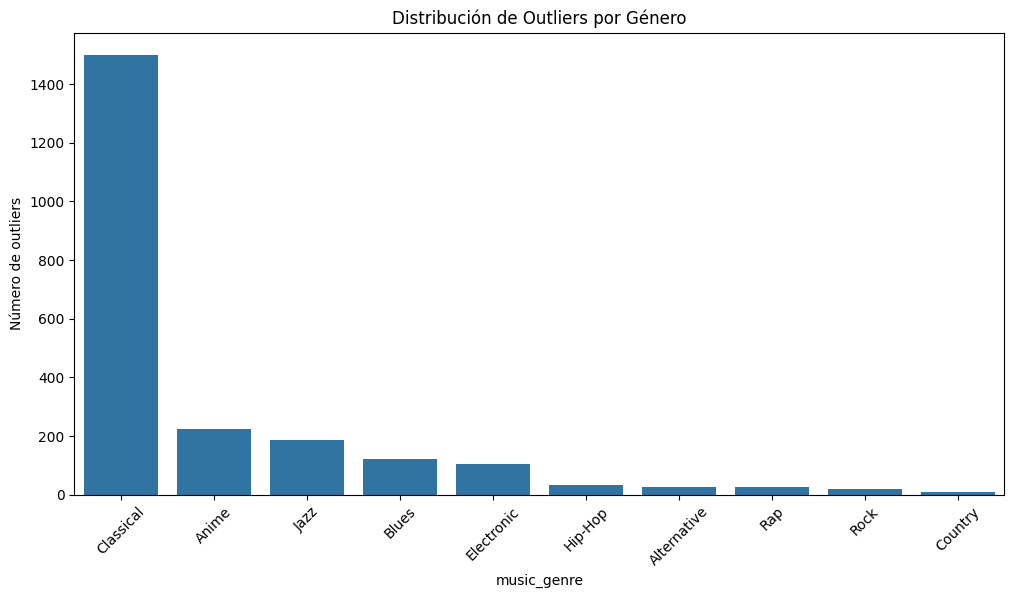

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd # Import pandas
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
from sklearn.preprocessing import StandardScaler

# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/proyecto de IA1/music_genre.csv')

# Limpieza de datos (como en el notebook original)
df_cleaned = df.dropna().drop_duplicates()
df_cleaned['popularity'] = df_cleaned['popularity'].astype(int)

# Seleccionar características numéricas
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                   'energy', 'instrumentalness', 'liveness', 'loudness',
                   'speechiness', 'tempo', 'valence']

# Convertir tempo a numérico (actualmente es string)
df_cleaned['tempo'] = pd.to_numeric(df_cleaned['tempo'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['tempo'])

# Estandarizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned[numeric_features])

# Detección de outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(scaled_features)

# Visualización
df_cleaned['outlier'] = outliers
outlier_genres = df_cleaned[df_cleaned['outlier'] == -1]['music_genre'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=outlier_genres.index, y=outlier_genres.values)
plt.title('Distribución de Outliers por Género')
plt.xticks(rotation=45)
plt.ylabel('Número de outliers')
plt.show()

# Análisis de Relaciones No Lineales con UMAP

In [ ]:
!pip install umap-learn==0.5.5

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


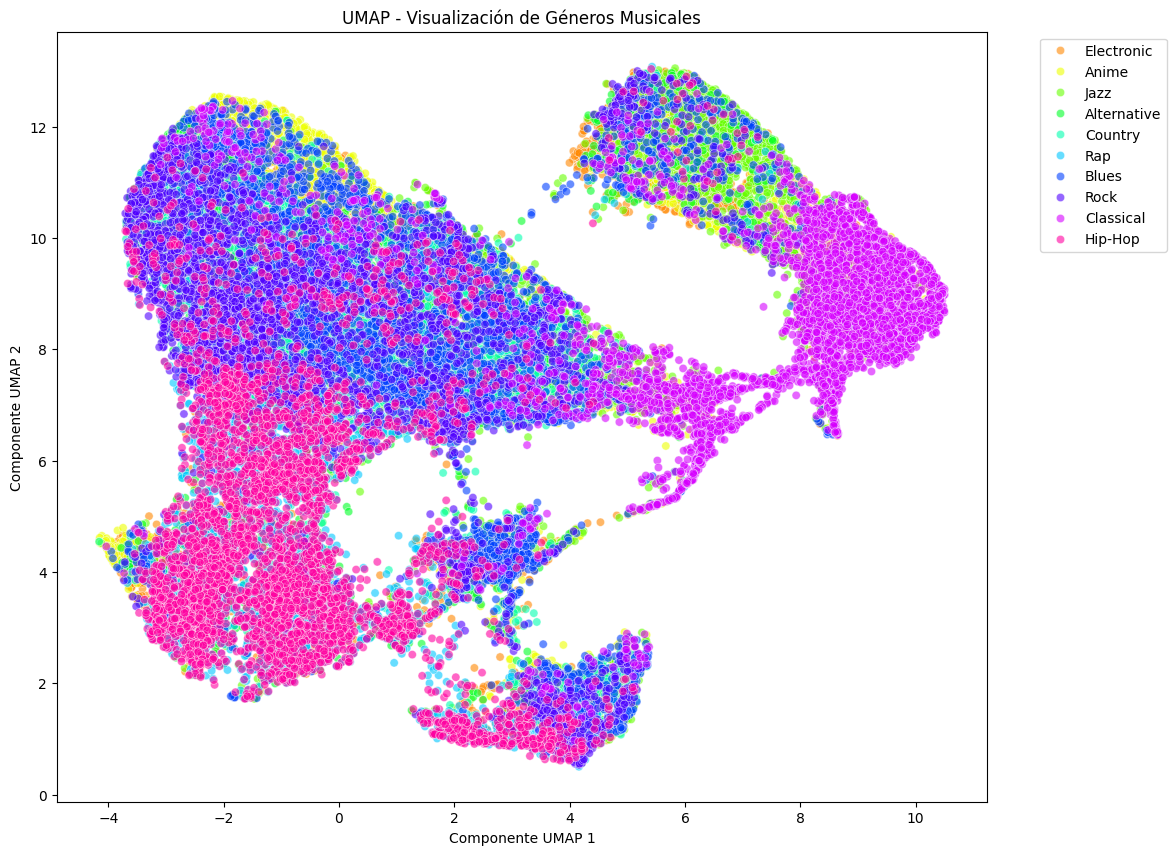

In [ ]:

try:
    import umap

    reducer = umap.UMAP(random_state=42)
    umap_result = reducer.fit_transform(scaled_features)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x=umap_result[:, 0], y=umap_result[:, 1],
        hue=df_cleaned['music_genre'],
        palette=sns.color_palette("hsv", len(df_cleaned['music_genre'].unique())),
        alpha=0.6
    )
    plt.title('UMAP - Visualización de Géneros Musicales')
    plt.xlabel('Componente UMAP 1')
    plt.ylabel('Componente UMAP 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
except ImportError:
    print("UMAP no está instalado. Puedes instalarlo con: pip install umap-learn")